#   

# 作業目標:

    1. 藉由固定的 dataset, 來驗證不同loss function
    2. Dataset 的特性跟我們選用的loss function 對accrancy 的影響
    
    
# 作業重點: 
    請分別選用 "MSE", "binary _crossentropy"
    查看Train/test accurancy and loss rate
    

# 導入必要的函數

In [1]:
from keras.datasets import cifar10
import numpy as np
np.random.seed(10)

Using TensorFlow backend.


# 資料準備

In [2]:
#取得Keras Dataset
(x_img_train,y_label_train),(x_img_test,y_label_test)=cifar10.load_data()

In [3]:
#確認 CIFAR10 Dataset 資料維度
print("train data:",'images:',x_img_train.shape,
      " labels:",y_label_train.shape) 
print("test  data:",'images:',x_img_test.shape ,
      " labels:",y_label_test.shape) 

train data: images: (50000, 32, 32, 3)  labels: (50000, 1)
test  data: images: (10000, 32, 32, 3)  labels: (10000, 1)


In [4]:
#資料正規化
x_img_train_normalize = x_img_train.astype('float32') / 255.0
x_img_test_normalize = x_img_test.astype('float32') / 255.0

In [5]:
#針對Label 做 ONE HOT ENCODE
from keras.utils import np_utils
y_label_train_OneHot = np_utils.to_categorical(y_label_train)
y_label_test_OneHot = np_utils.to_categorical(y_label_test)
y_label_test_OneHot.shape

(10000, 10)

# 建立模型

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D

In [7]:
# 宣告採用序列模型
model = Sequential()

In [8]:
#卷積層1與池化層1
model.add(Conv2D(filters=32,kernel_size=(3,3),
                 input_shape=(32, 32,3), 
                 activation='relu', 
                 padding='same'))
model.add(Dropout(rate=0.25))
model.add(MaxPooling2D(pool_size=(2, 2)))

In [9]:
#卷積層2與池化層2
model.add(Conv2D(filters=64, kernel_size=(3, 3), 
                 activation='relu', padding='same'))
model.add(Dropout(0.25))
model.add(MaxPooling2D(pool_size=(2, 2)))

In [10]:
#建立神經網路(平坦層、隱藏層、輸出層)
model.add(Flatten())
model.add(Dropout(rate=0.25))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(rate=0.25))
model.add(Dense(10, activation='softmax'))

In [11]:
#檢查model 的STACK
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
dropout (Dropout)            (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 4096)              0

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

#定義一個繪圖函數
def show_train_history(train_acc,test_acc):
    plt.plot(train_history.history[train_acc])
    plt.plot(train_history.history[test_acc])
    plt.title('Train History')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train_acc', 'val_acc'], loc='upper left')
    plt.show()

# 訓練模型

#### loss='categorical_crossentropy'

In [13]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
train_history=model.fit(x_img_train_normalize, y_label_train_OneHot,
                        validation_split=0.25,
                        epochs=12, batch_size=128, verbose=1)

Train on 37500 samples, validate on 12500 samples
Epoch 1/12
37500/37500 [==============================] - 39s 1ms/sample - loss: 0.3257 - accuracy: 0.9000 - val_loss: 0.3244 - val_accuracy: 0.9000
Epoch 2/12
37500/37500 [==============================] - 40s 1ms/sample - loss: 0.3252 - accuracy: 0.9000 - val_loss: 0.3241 - val_accuracy: 0.9000
Epoch 3/12
37500/37500 [==============================] - 42s 1ms/sample - loss: 0.3247 - accuracy: 0.9000 - val_loss: 0.3239 - val_accuracy: 0.9000
Epoch 4/12
37500/37500 [==============================] - 44s 1ms/sample - loss: 0.3243 - accuracy: 0.9000 - val_loss: 0.3237 - val_accuracy: 0.9000
Epoch 5/12
37500/37500 [==============================] - 44s 1ms/sample - loss: 0.3239 - accuracy: 0.9000 - val_loss: 0.3235 - val_accuracy: 0.9000
Epoch 6/12
37500/37500 [==============================] - 43s 1ms/sample - loss: 0.3238 - accuracy: 0.9000 - val_loss: 0.3233 - val_accuracy: 0.9000
Epoch 7/12
37500/37500 [==============================] 

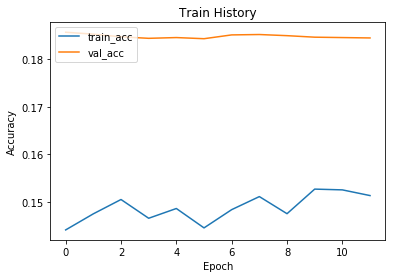

In [19]:
show_train_history('accuracy','val_accuracy')

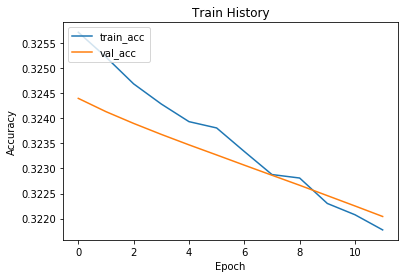

In [15]:
show_train_history('loss','val_loss')

#### loss='MSE'

In [16]:
model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])
train_history=model.fit(x_img_train_normalize, y_label_train_OneHot,
                        validation_split=0.25,
                        epochs=12, batch_size=128, verbose=1)

Train on 37500 samples, validate on 12500 samples
Epoch 1/12
37500/37500 [==============================] - 48s 1ms/sample - loss: 0.0893 - accuracy: 0.1441 - val_loss: 0.0894 - val_accuracy: 0.1857
Epoch 2/12
37500/37500 [==============================] - 48s 1ms/sample - loss: 0.0893 - accuracy: 0.1475 - val_loss: 0.0894 - val_accuracy: 0.1853
Epoch 3/12
37500/37500 [==============================] - 48s 1ms/sample - loss: 0.0893 - accuracy: 0.1505 - val_loss: 0.0894 - val_accuracy: 0.1847
Epoch 4/12
37500/37500 [==============================] - 48s 1ms/sample - loss: 0.0893 - accuracy: 0.1465 - val_loss: 0.0894 - val_accuracy: 0.1844
Epoch 5/12
37500/37500 [==============================] - 44s 1ms/sample - loss: 0.0893 - accuracy: 0.1486 - val_loss: 0.0894 - val_accuracy: 0.1846
Epoch 6/12
37500/37500 [==============================] - 43s 1ms/sample - loss: 0.0893 - accuracy: 0.1445 - val_loss: 0.0894 - val_accuracy: 0.1843
Epoch 7/12
37500/37500 [==============================] 

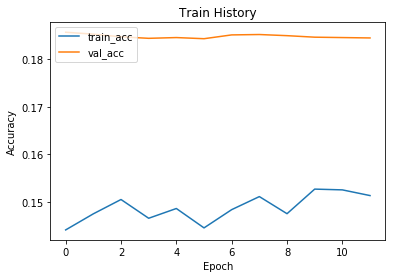

In [17]:
show_train_history('accuracy','val_accuracy')

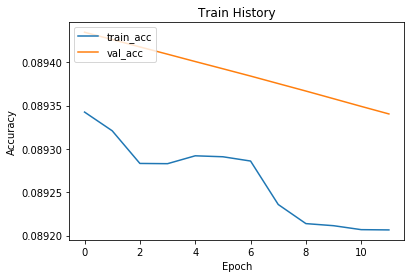

In [18]:
show_train_history('loss','val_loss')